## Ejemplo Conexión con Python
Recuerda, sólo es un ejemplo de a qué puedes llegar con una base de datos.

In [2]:
# Instalar bibliotecas necesarias
!pip install pymongo pandas matplotlib

In [3]:
# Conectar a MongoDB y obtener los datos
from pymongo import MongoClient
import pandas as pd

MONGO_DB_URL = 'mongodb+srv://<user>:<password>@<cluster>/Metro'
client = MongoClient(MONGO_DB_URL)
db = client['Metro']
collection = db['afluencia']

data = list(collection.find())
df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
df.head()

,_id,fecha,mes,anio,linea,estacion,tipo_pago,afluencia
0,6678bb199e01f1541e65436f,2021-01-01,Enero,2021,Línea 1,Balbuena,Boleto,1848
1,6678bb199e01f1541e654370,2021-01-01,Enero,2021,Línea 1,Balbuena,Prepago,790
2,6678bb199e01f1541e654371,2021-01-01,Enero,2021,Línea 1,Balbuena,Gratuidad,325
3,6678bb199e01f1541e654372,2021-01-01,Enero,2021,Línea 1,Balderas,Boleto,1103
4,6678bb199e01f1541e654373,2021-01-01,Enero,2021,Línea 1,Balderas,Prepago,922


In [4]:
# Análisis exploratorio y visualizaciones
import matplotlib.pyplot as plt

# Eliminar la columna '_id'
if '_id' in df.columns:
    df.drop('_id', axis=1, inplace=True)

In [5]:
# Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(df.describe())

Estadísticas descriptivas:
                     fecha           anio      afluencia
count               675675  675675.000000  675675.000000
mean   2022-08-01 00:00:00    2022.103896    4618.324464
min    2021-01-01 00:00:00    2021.000000       0.000000
25%    2021-10-16 00:00:00    2021.000000     643.000000
50%    2022-08-01 00:00:00    2022.000000    2313.000000
75%    2023-05-17 00:00:00    2023.000000    5691.000000
max    2024-02-29 00:00:00    2024.000000  106403.000000
std                    NaN       0.910513    7059.204879


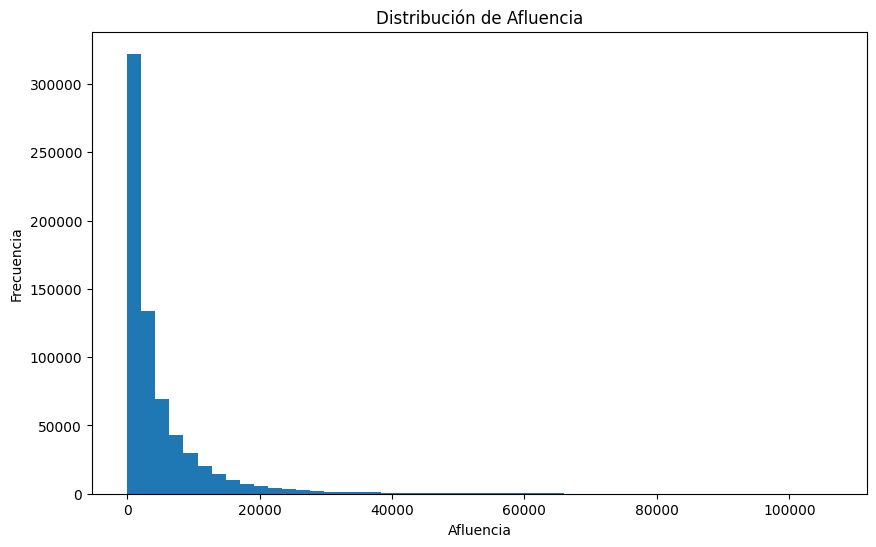

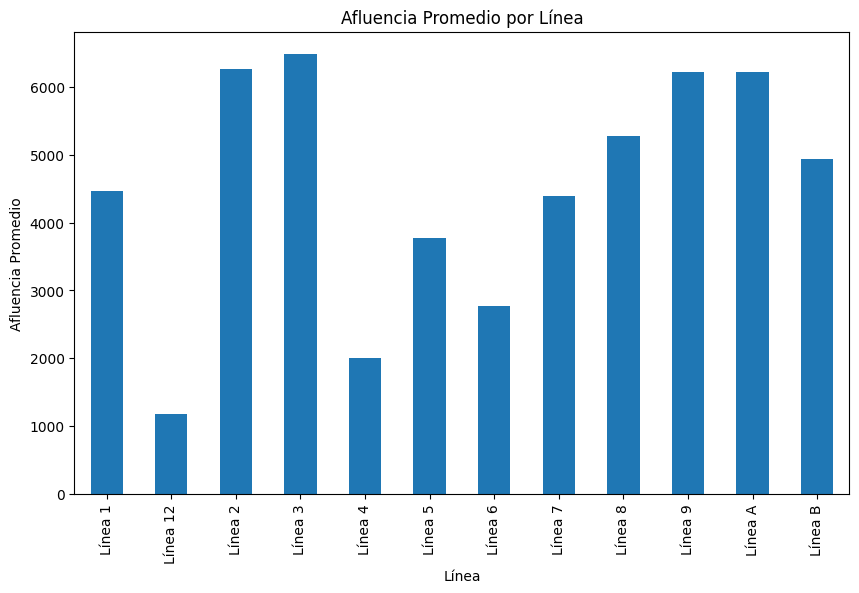

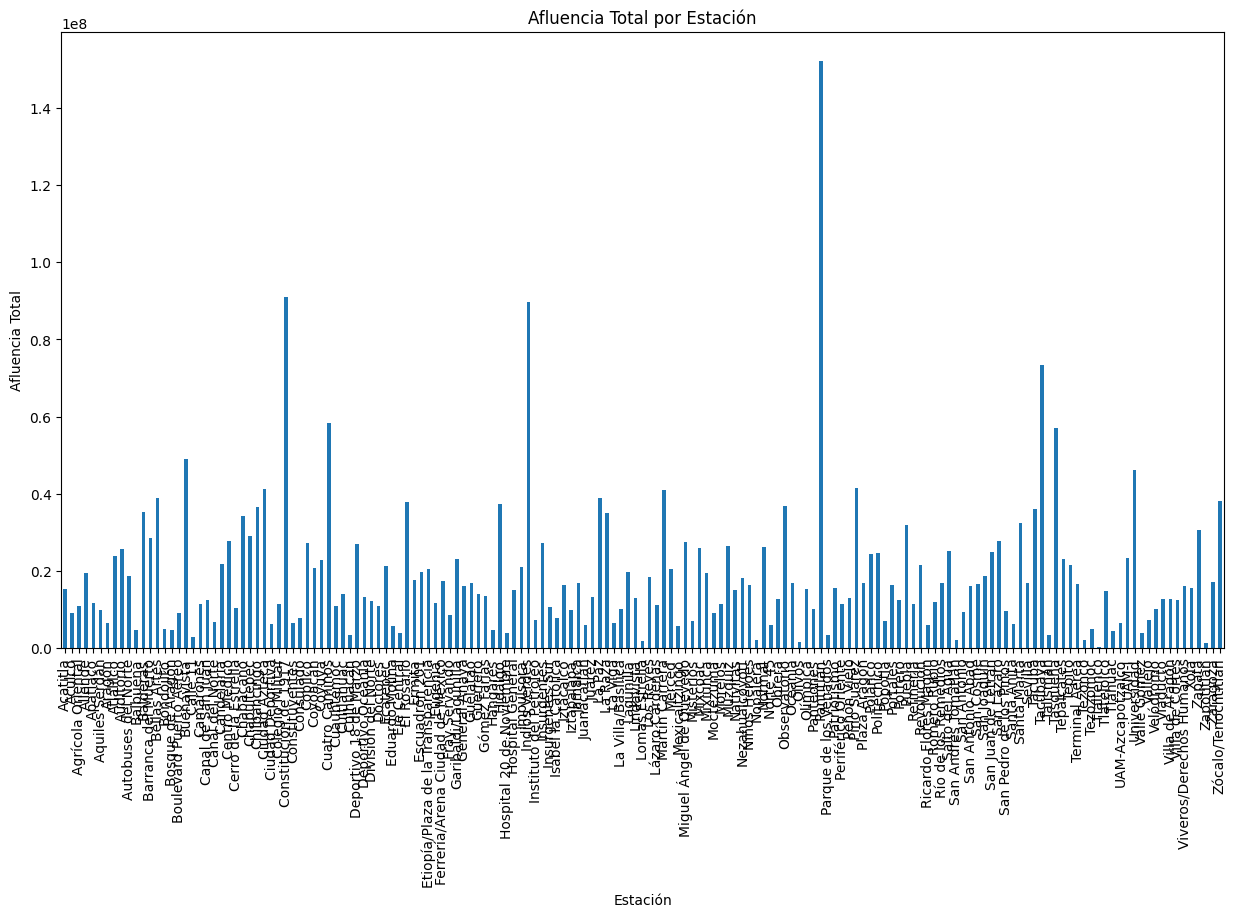

In [6]:
# Gráficos
plt.figure(figsize=(10, 6))
df['afluencia'].plot(kind='hist', bins=50, title='Distribución de Afluencia')
plt.xlabel('Afluencia')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
df.groupby('linea')['afluencia'].mean().plot(kind='bar', title='Afluencia Promedio por Línea')
plt.xlabel('Línea')
plt.ylabel('Afluencia Promedio')
plt.show()

plt.figure(figsize=(15, 8))
df.groupby('estacion')['afluencia'].sum().plot(kind='bar', title='Afluencia Total por Estación')
plt.xlabel('Estación')
plt.ylabel('Afluencia Total')
plt.show()

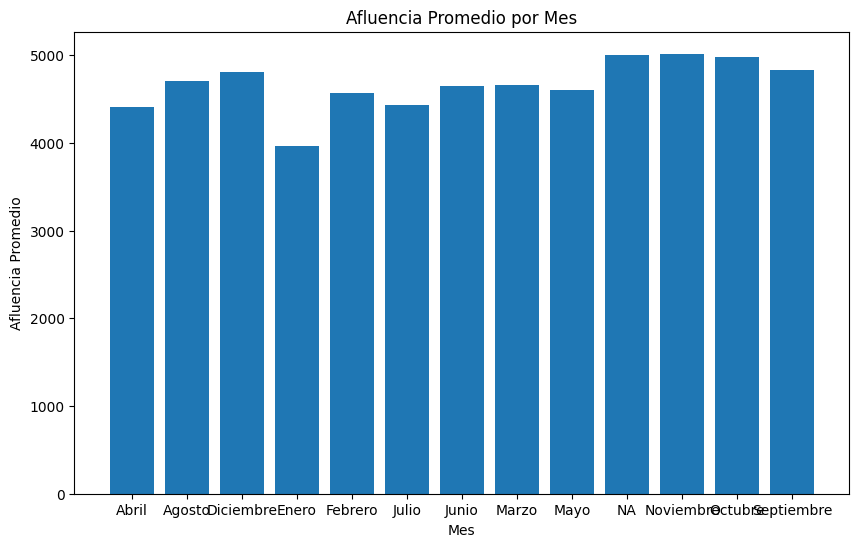

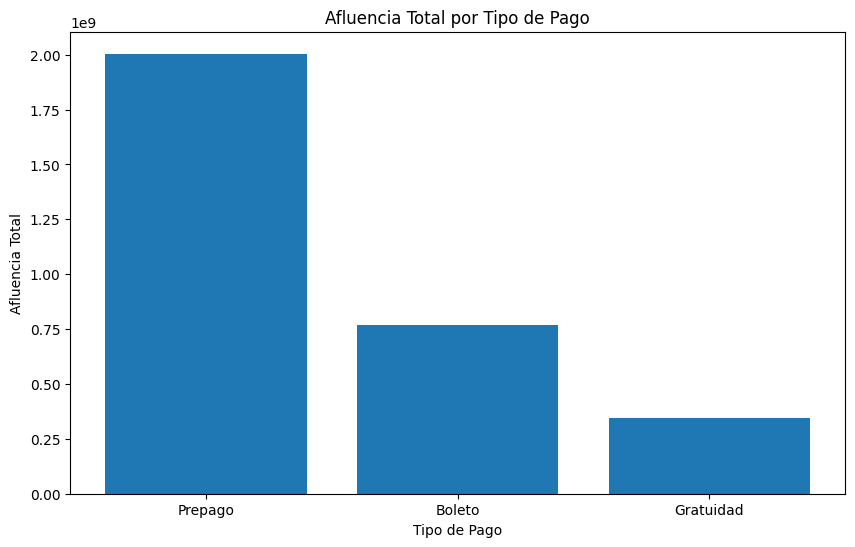

In [7]:
# Análisis adicional utilizando agregaciones
# Afluencia promedio por mes
pipeline = [
    {"$group": {"_id": "$mes", "afluencia_promedio": {"$avg": "$afluencia"}}},
    {"$sort": {"_id": 1}}
]
result = list(collection.aggregate(pipeline))
df_monthly = pd.DataFrame(result)

plt.figure(figsize=(10, 6))
plt.bar(df_monthly['_id'], df_monthly['afluencia_promedio'])
plt.xlabel('Mes')
plt.ylabel('Afluencia Promedio')
plt.title('Afluencia Promedio por Mes')
plt.show()

# Afluencia total por tipo de pago
pipeline = [
    {"$group": {"_id": "$tipo_pago", "afluencia_total": {"$sum": "$afluencia"}}},
    {"$sort": {"afluencia_total": -1}}
]
result = list(collection.aggregate(pipeline))
df_payment = pd.DataFrame(result)

plt.figure(figsize=(10, 6))
plt.bar(df_payment['_id'], df_payment['afluencia_total'])
plt.xlabel('Tipo de Pago')
plt.ylabel('Afluencia Total')
plt.title('Afluencia Total por Tipo de Pago')
plt.show()
